<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/Google_Notebook_and_Tensorflow_(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load a TensorFlow Dataset (TFDS) as NumPy
The previous lecture a modeled Fashion-MNIST data based on a ***Keras dataset*** was used. However, Keras does not provide biomedical images for studying and practicing. Instead, TensorFlow provides TFDS. In this way, we can load data as a ***TensorFlow dataset (TFDS)*** and convert it into NumPy arrays for very easy processing. We cover TFDS in detail in a later chapter.

For this experiment, we load the colorectal_histology dataset instead of Fashion-MNIST. Once the data is loaded and converted to NumPy, the input pipeline phases are the same as in the previous Lecture.


---
**Create a training set as NumPy arrays in a single batch:** This may take a few minutes.

---



In [1]:
import tensorflow_datasets as tfds
image_train, label_train = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='train',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_train), image_train.shape

(numpy.ndarray, (5000, 150, 150, 3))

By using `batch_size=-1`, the full dataset is loaded as a single batch. The `tfds.load()` function loads the dataset. The `tfds.as_numpy()` function converts the dataset to NumPy arrays.

The training set contains 5000 150 × 150 images. The *3* dimension indicates that the data is a color image. A **grayscale** image is one in which the only colors are shades of gray. That is, the image only contains luminance (or brightness) information and no color information.

The 'colorectal_histology' dataset has only a training split and does not have a separate split for testing.

---
Create the corresponding test set:

---
``` python
image_test, label_test = tfds.as_numpy(
    tfds.load(
        'colorectal_histology', split='test',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_test), image_test.shape
```
But this code give error because split is not a automatic set in this dataset.

```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-4-a2a47f7dc17c> in <cell line: 1>()
      1 image_test, label_test = tfds.as_numpy(
----> 2     tfds.load(
      3         'colorectal_histology', split='test',
      4         batch_size=-1, as_supervised=True,
      5         try_gcs=True))

16 frames
/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/core/splits.py in _rel_to_abs_instr(rel_instr, split_infos)
    778   split = rel_instr.split_name
    779   if split not in split_infos:
--> 780     raise ValueError(
    781         f'Unknown split {split!r}. Should be one of {list(split_infos)}.'
    782     )

ValueError: Unknown split 'test'. Should be one of ['train'].
```
We need manually split the dataset.

In [2]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# to numpy data
data = tfds.as_numpy(dataset)

# Setting images and labels list
images = []
labels = []

for example in data:
    images.append(example['image'])
    labels.append(example['label'])

# list to numpy arrays
images = np.array(images)
labels = np.array(labels)

# split train in 80% train and 20% test
image_train, image_test, label_train, label_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify
print("Train Images Shape:", image_train.shape)
print("Test Images Shape:", image_test.shape)



Train Images Shape: (4000, 150, 150, 3)
Test Images Shape: (1000, 150, 150, 3)


## Inspect Shapes and Pixel Intensity

---
**Get training shapes:**

---

In [3]:
image_train.shape, label_train.shape

((4000, 150, 150, 3), (4000,))

---
**Get test shapes:**

---

In [4]:
image_test.shape, label_test.shape

((1000, 150, 150, 3), (1000,))

---
Display one sample image

---

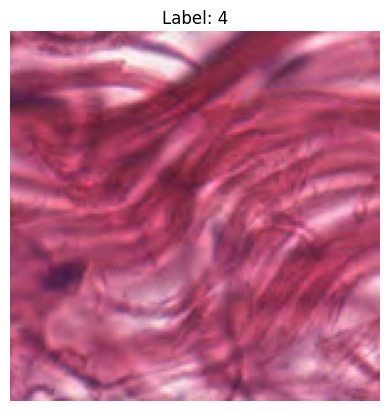

In [5]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
dataset = tfds.load('colorectal_histology', split='train')

# Take one example from the dataset (the first one)
example = next(iter(dataset))

# Extract the image and label from the example
image, label = example['image'], example['label']

# Display the image
plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

To get information about the classes in a dataset using TensorFlow Datasets (TFDS), you can load the dataset with with_info=True to access the dataset's metadata. Here’s how you can do it:

In [6]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos con información
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Obtener las clases
classes = info.features['label'].names

# Mostrar las clases
print("Classes:", classes)


Classes: ['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


**Label: 4** is very confussing. We need take a semantic label.


---

Display one image sample and its label

---



Classes: ['tumor', 'stroma', 'complex', 'lympho', 'debris', 'mucosa', 'adipose', 'empty']


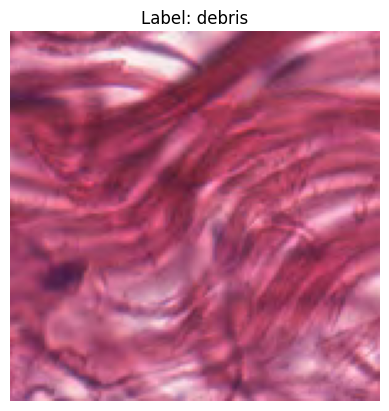

In [7]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Print the class names
print("Classes:", classes)

# Display an image from the dataset with its label
# Take one example from the dataset
example = next(iter(dataset))

# Extract the image and label from the example
image, label = example['image'], example['label']

# Show the image
plt.imshow(image)
plt.title(f'Label: {classes[label]}')
plt.axis('off')
plt.show()



---
**Display one sample for each class**

---

To get one image and its corresponding class for each class in a dataset using TensorFlow Datasets (TFDS), you can iterate through the dataset and collect one example for each class. Here's how you can do it:
1. Loads the 'colorectal_histology' dataset along with its metadata.
2. Initializes a dictionary to store one example per class.
3. Iterates through the dataset, storing one image and its label for each class.
4. Once all classes have at least one example, it stops iterating.
5. Uses matplotlib to plot the images and display their labels.

Make sure to adjust the plotting layout according to the number of classes to avoid any layout issues. The `plt.subplots` call in this example assumes there are an even number of classes and lays them out in two rows. Adjust the number of rows and columns based on your dataset.




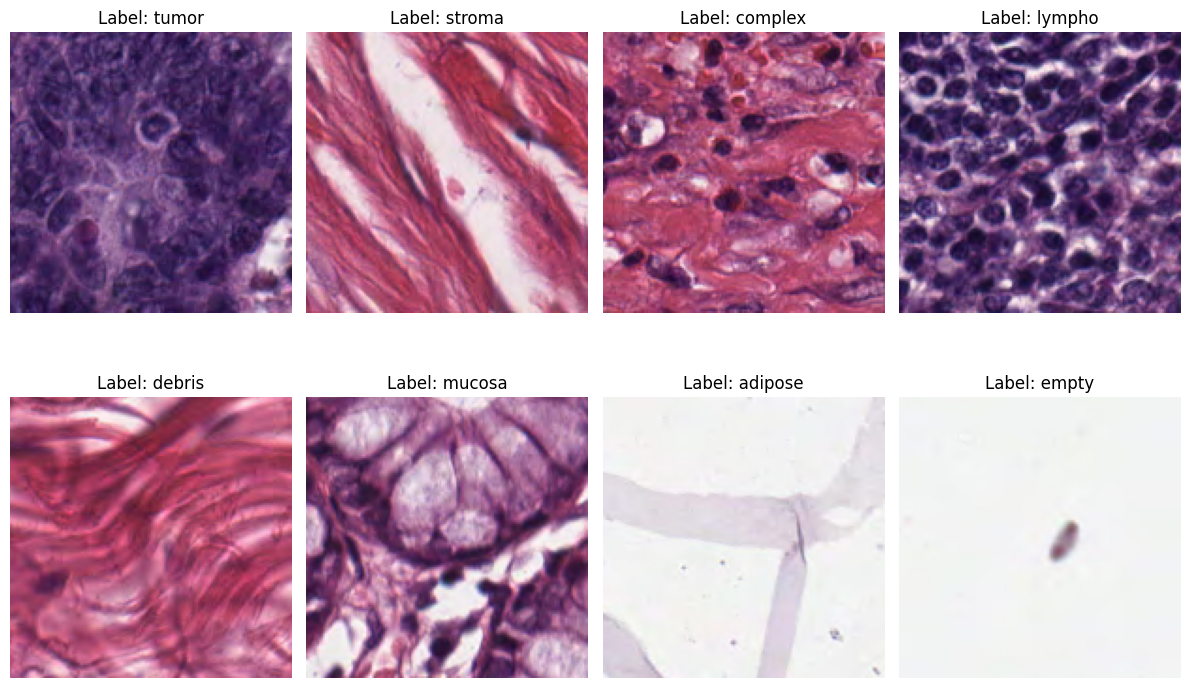

In [8]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with info
dataset, info = tfds.load('colorectal_histology', split='train', with_info=True)

# Get the class names
classes = info.features['label'].names

# Initialize a dictionary to store one example per class
class_examples = {class_name: None for class_name in classes}

# Iterate through the dataset and collect one example for each class
for example in dataset:
    image, label = example['image'], example['label'].numpy()
    class_name = classes[label]
    if class_examples[class_name] is None:
        class_examples[class_name] = (image, class_name)
    if all(class_examples.values()):
        break  # Stop once we have one example per class

# Plot the images with their labels
num_rows = 2
num_cols = len(classes) // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for idx, (class_name, (image, label)) in enumerate(class_examples.items()):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.imshow(image)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()


## Scale (normalize)
Since NumPy array values are float, divide them by 255 to normalize the image pixels:

---
**Normalize**

---

In [9]:
train_sc = image_train / 255.0
test_sc = image_test / 255.0

Verify that normalization worked:

---
**Verify normalization**

---

In [10]:
# Verify the scaling or normalization
print("Training data - min:", np.min(train_sc), "max:", np.max(train_sc))
print("Testing data - min:", np.min(test_sc), "max:", np.max(test_sc))

Training data - min: 0.0 max: 1.0
Testing data - min: 0.0 max: 1.0


This code will output the minimum and maximum values of the scaled training and testing data. If the scaling is correct, the minimum value should be 0.0 (or very close to it), and the maximum value should be 1.0 (or very close to it).

For a more detailed check, you can also inspect the values of a few specific pixels or entire images:

---
**Inspect the values**

---

In [11]:
# Check a few pixels in the scaled training data
print("Sample pixel values from training data:")
print(train_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(train_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(train_sc[0, 0, 2])  # Pixel value of the third pixel in the first image

# Check a few pixels in the scaled testing data
print("Sample pixel values from testing data:")
print(test_sc[0, 0, 0])  # Pixel value of the first pixel in the first image
print(test_sc[0, 0, 1])  # Pixel value of the second pixel in the first image
print(test_sc[0, 0, 2])  # Pixel value of the third pixel in the first image


Sample pixel values from training data:
[0.54901961 0.20784314 0.37254902]
[0.49411765 0.19215686 0.36470588]
[0.49411765 0.19215686 0.36470588]
Sample pixel values from testing data:
[0.8        0.31764706 0.4627451 ]
[0.77254902 0.29019608 0.43529412]
[0.77254902 0.29019608 0.43529412]


## Prepare Data for TensorFlow Consumption
Slice NumPy arrays into TensorFlow datasets:

---
**Numpy to Tensor**

---

In [12]:
import tensorflow as tf

train_crht = tf.data.Dataset.from_tensor_slices(
    (train_sc, label_train))
test_crht = tf.data.Dataset.from_tensor_slices(
    (test_sc, label_test))

---
**Inspect**

---

In [13]:
train_crht, test_crht

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

## Build the Consumable Input Pipeline

---
Initialize parameters, shuffle training data, and batch and prefetch training and test data:

---

In [14]:
batch_size = 100
shuffle_size = 10000
train_crhtds = train_crht.shuffle(shuffle_size).\
                         batch(batch_size).prefetch(1)
test_crhtds = test_crht.batch(batch_size).prefetch(1)

---

**Inspect tensors:**

---

In [15]:
train_crhtds, test_crhtds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Build the Model
Earlier, we imported requisite libraries. Since they are already in memory, we don’t need to import them again (assuming that we are using the same notebook).

---

**Get tensor shape**

---

In [16]:
np_shape = image_test.shape[1:]
np_shape

(150, 150, 3)

Clear previous models and generate a seed for reproducibility of results:

---
**Seed for reproducibility**

---

In [17]:
np.random.seed(0)
tf.random.set_seed(0)
tf.keras.backend.clear_session()

---
**Create the model**

---

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
  Flatten(input_shape=np_shape),
  Dense(512, activation='relu'),
  Dense(8, activation='softmax')
])

# Other Models
```
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization

# Define the input shape
np_shape = train_sc.shape[1:]

# Improved model
model = Sequential([
    Flatten(input_shape=np_shape),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Assuming 8 classes in the dataset
])
```

and other

```
from tensorflow.keras.layers import Conv2D, MaxPooling2D

num_classes = len(classes)

model = tf.keras.Sequential([
  Conv2D(32, 3, activation='relu',
         input_shape=np_shape),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

```

## Compile and Train the Model
Compile with sparse categorical cross-entropy. Notice that we **don't** set *from_logits=True* because we use *softmax* activation in the output layer of the model to produce a probability distribution from the logits. The **softmax** activation function acts on a vector to increase the difference between the largest component and all others and normalizes the vector to have a sum of 1 so that it can be interpreted as a vector of probabilities. It is used as the last step in classifiers:

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
Show the model architecture

---

In [20]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 34564616 (131.85 MB)
Trainable params: 34564616 (131.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
**Train the model:** This may take a few minutes.

---

In [21]:
epochs = 3
history = model.fit(train_crhtds, epochs=epochs, verbose=1,
                     validation_data=test_crhtds)

Epoch 1/3
40/40 [==============================] - 39s 925ms/step - loss: 65.8587 - accuracy: 0.2103 - val_loss: 17.6351 - val_accuracy: 0.2260
Epoch 2/3
40/40 [==============================] - 36s 874ms/step - loss: 5.2047 - accuracy: 0.3627 - val_loss: 1.5335 - val_accuracy: 0.4400
Epoch 3/3
40/40 [==============================] - 36s 875ms/step - loss: 2.9752 - accuracy: 0.4160 - val_loss: 2.3213 - val_accuracy: 0.4270


# Create a Dataset from Files

To use a manually downloaded dataset with TensorFlow Datasets (TFDS), the dataset structure and metadata must be properly set up to be recognized by TFDS. Unfortunately, TFDS expects a certain structure for its datasets, which can be challenging when using manually downloaded files.

## Download the Dataset:
Download the cell_images.zip file from the provided URL.

In [ ]:
import tensorflow as tf
import pathlib
import zipfile
import os

dataset_url = 'https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip'

data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='cell_images.zip', extract=False)
data_dir = pathlib.Path(data_dir)

353452851/353452851 [==============================] - 2s 0us/step


## Extract the Dataset

Unzip the downloaded file

In [ ]:
# Convert to a pathlib Path object
data_dir = pathlib.Path(data_dir)

# Define the malaria dataset directory path
malaria_dir = pathlib.Path('/content/datasets/malaria')
# Ensure the malaria directory exists
malaria_dir.mkdir(parents=True, exist_ok=True)

# Extract the zip file into the manual directory
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall(malaria_dir)

# Verify the extraction
print(f'Extracted files to {malaria_dir}')

Extracted files to /content/datasets/malaria


## Inspect the Dataset

The dataset contains several thousand photos of cell images in two subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:

In [ ]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Print the directory tree
print_directory_tree(data_dir)


cell_images
    |-- Parasitized
    |-- Uninfected


## Load the Dataset

Using Keras `image_dataset_from_directory` and create train and validation sets. The `tf.keras.preprocessing.image_dataset_from_directory` utility offers incredible convenience for loading and parsing images off disk!

We set batch size initially to 32 because it tends to be a good size for many of the datasets with which we work. We set image height and width at 224 because we get good results and the model trains really fast. Feel free to experiment with these parameters.

Our inspection revealed that image size differs. Since TensorFlow models expect images of the same size, we must resize them.

## Create Training and Test Sets
The `tf.keras.preprocessing.image_dataset_from_directory` utility generates a tf.data. Dataset from image files in a directory. The utility is very useful because it allows us to conveniently split, seed, resize, and batch data. Let’s split data into 80% training and 20% test sets. Theoretically we must set this split based on numerous experiments. Of course, you can tweak
the sizes with your own experiment. The combination of the `validation_split` and `subset` parameters determines the train and test splits.

In [ ]:
import tensorflow as tf
import pathlib

# Define the data directory
data_dir = pathlib.Path('/content/datasets/malaria/cell_images')

# Load the dataset using image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Split 80% for training and 20% for validation
    subset="training",
    seed=123,
    image_size=(64, 64),  # Resize images to 224x224
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


## Display images and labels from some batch

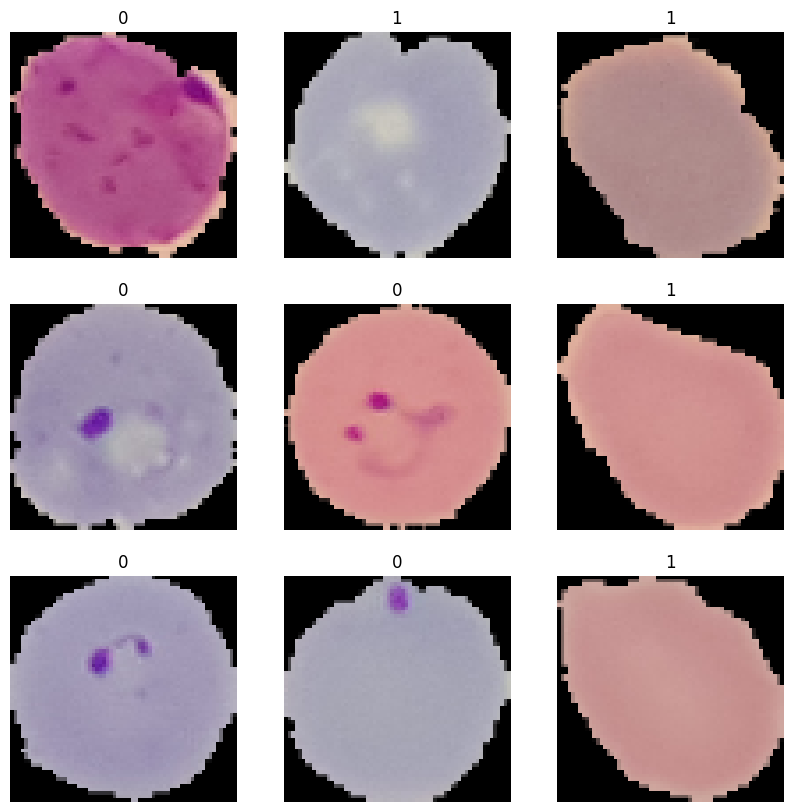

In [ ]:
# Show a batch of images and labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

plt.show()

## Count the number of images

Count the number of images in the "Parasitized" and "Uninfected" directories

In [ ]:
import os

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Count the number of images in each subdirectory
parasitized_count = len(os.listdir(os.path.join(data_dir, 'Parasitized')))
uninfected_count = len(os.listdir(os.path.join(data_dir, 'Uninfected')))

# Print the counts
print(f'Parasitized: {parasitized_count} images')
print(f'Uninfected: {uninfected_count} images')


Parasitized: 13780 images
Uninfected: 13780 images


## Display some images

From the "Parasitized" and "Uninfected" directories, you can use the matplotlib library to display 4 images from each directory:

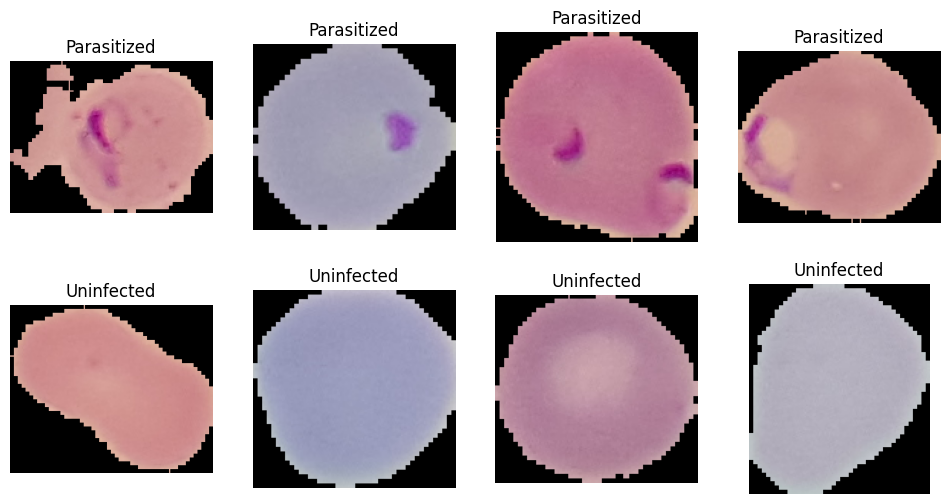

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Define the number of images to display from each class
num_images_per_class = 4

# Define the paths to the image directories
parasitized_dir = os.path.join(data_dir, 'Parasitized')
uninfected_dir = os.path.join(data_dir, 'Uninfected')

# Get the list of images in each directory
parasitized_images = os.listdir(parasitized_dir)[:num_images_per_class]
uninfected_images = os.listdir(uninfected_dir)[:num_images_per_class]

# Display Parasitized images
plt.figure(figsize=(12, 6))
for i, image_name in enumerate(parasitized_images):
    img_path = os.path.join(parasitized_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Parasitized')

# Display Uninfected images
for i, image_name in enumerate(uninfected_images):
    img_path = os.path.join(uninfected_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i+5)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Uninfected')

plt.show()


Notice that images are not of the same size!

# Parse Data

*Inspect* Tensors


In [ ]:
train_ds, test_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

Take the first batch from the training set and preserve shapes:

In [ ]:
for img, lbl in train_ds.take(1):
  print (img.shape, lbl.shape)
cell_shape, just_img = img.shape[1:],\
                         img.shape[1:3]


(32, 64, 64, 3) (32,)


We take the first batch to help us inspect a batch from the dataset. We preserve the shape of the batch and batch size for use in the model. Batch size is 32, and images are resized to 224 × 224 × 3. The 3 value indicates that images have three channels, which means they are RGB (color). Labels have shape (32,) that corresponds to the 32 batch size of labels.


## Get Class Names
We already identified the classes from the directory names. But we can now access them with the `class_names` method:

In [ ]:
# Check the class names
class_names = train_ds.class_names
print(class_names)


['Parasitized', 'Uninfected']


# Display images from a batch in memory

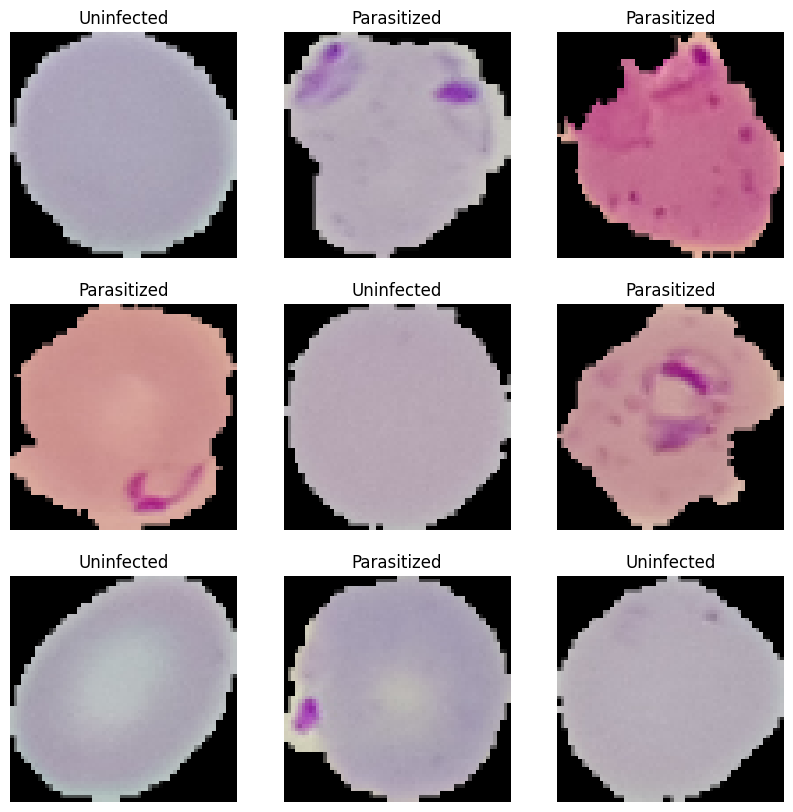

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

## Scale the Data
As noted earlier in the chapter, a pixel is represented by 256 values. So RGB channel values are in the [0, 255] range. Since neural networks work better with small values, data is typically scaled to be in the [0, 1] range.

Create a function to scale images:

In [ ]:
def format_image(image, label):
  image = tf.image.resize(image, just_img) / 255.0
  return image, label

The function is used when we configure the input pipeline.
## Configure the Dataset for Performance
Use buffered prefetching to get data from disk to mitigate I/O issues. Cache data to keep images in memory after they’re loaded off disk. Caching saves operations like file opening and data reading from being executed during each epoch.
## Build the Input Pipeline
Scale, shuffle the training set, and cache and prefetch train and test sets:


In [ ]:
SHUFFLE_SIZE = 100

train_cds = train_ds.map(format_image).\
  shuffle(SHUFFLE_SIZE).cache().prefetch(1)
test_cds = test_ds.map(format_image).\
  cache().prefetch(1)

In [ ]:
import numpy as np

# Verify min and max values in the training and test datasets
train_images = np.concatenate([x.numpy() for x, _ in train_cds], axis=0)
test_images = np.concatenate([x.numpy() for x, _ in test_cds], axis=0)

print("Training dataset - min value:", train_images.min(), "max value:", train_images.max())
print("Test dataset - min value:", test_images.min(), "max value:", test_images.max())

Training dataset - min value: 0.0 max value: 1.0
Test dataset - min value: 0.0 max value: 1.0


---
**Note** since training and test data have already been batched by the utility, do not batch when building the input pipeline!

---

## Build the Model
Since we are working with large color images, we need to build a convolutional neural network (CNN) model to garner respectable performance because flower images are color with higher pixel counts.

We need additional libraries for a CNN:

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Get the number of classes for use in the model:

In [ ]:
num_classes = len(class_names)
num_classes

2

Clear any previous models and generate a random seed:

In [ ]:
import numpy as np

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create a multilayer CNN

In [ ]:
cell_model = tf.keras.Sequential([
  Conv2D(32, 3, activation='relu',
         input_shape=cell_shape),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

The first layer scales the data. The second layer contains 32 neurons with a 3 × 3 convolutional kernel (or filter). Activation is relu. The third layer uses maximum pooling to reduce the spatial size of a layer by just keeping the maximum values. As such,
the pooling layer reduces image dimensionality without losing important features or patterns. The next four layers repeat the same pattern as the second and third layers. The Flatten layer converts pooled data into a single column because a Dense layer expects data in this form. The final Dense layer enables classification and prediction.

Compile and Train the Model
Compile with `SparseCategoricalCrossentropy()`:


In [ ]:
cell_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
# Print the model summary
cell_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

Since softmax is applied to outputs, we **don’t** set from_logits=True. Train the model:

In [ ]:
history = cell_model.fit(
    train_cds,
    validation_data=test_cds,
    epochs=1)


689/689 [==============================] - 9s 7ms/step - loss: 0.3131 - accuracy: 0.8548 - val_loss: 0.1481 - val_accuracy: 0.9521


The model is overfitting because validation accuracy is low compared to training accuracy. But we have not made any attempt to tune the model. In the next chapter, we explore a powerful technique to mitigate overfitting.

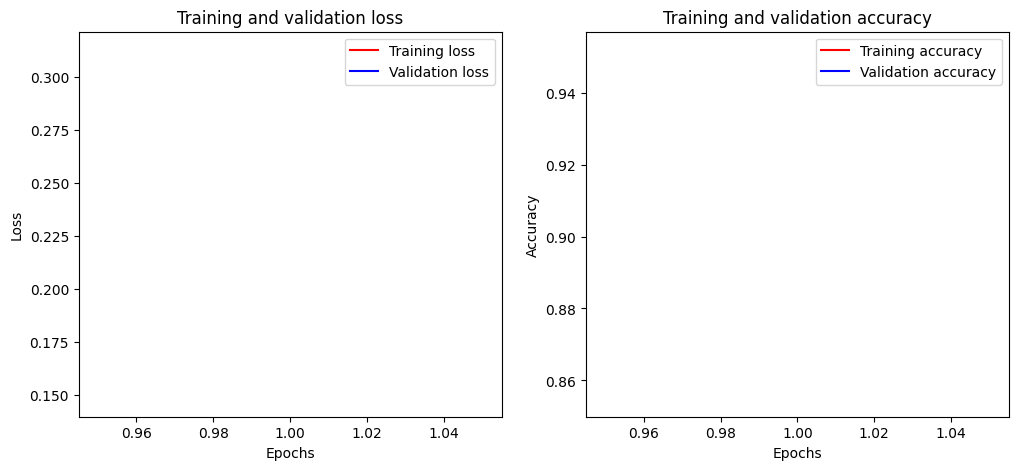

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Test Loss: 0.1481221318244934
Test Accuracy: 0.9520958065986633


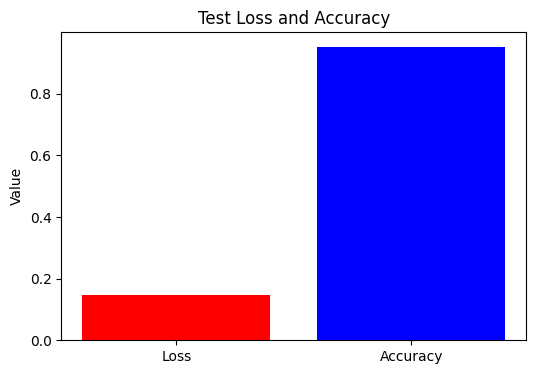

In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = cell_model.evaluate(test_cds, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test data
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['red', 'blue'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()

173/173 [==============================] - 0s 2ms/step
Length of y_true: 5511
Length of y_pred_classes: 5511


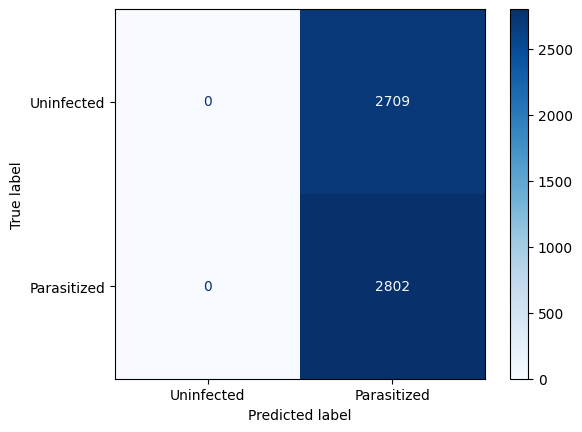

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = np.max(np.abs((cell_model.predict(test_cds))),1)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()


# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_cds], axis=0)

print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Uninfected', 'Parasitized'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

------------------------------------------------------------------ HASTA AQUI --------------

# Get Flowers from Google Cloud Storage
We demonstrated input pipelining with data from memory and from files. We can also pipeline data from cloud storage. Flowers data is hosted in a public bucket on Google Cloud Storage (GCS). So we can grab flower files from GCS. We can read flowers as JPEG files or as TFRecord files. For data modeling, we use TFRecord files. For optimal performance, we read from multiple TFRecord files at once. The TFRecord format is a simple format for storing a sequence of binary records. A TFRecord file contains a sequence of records, which can only be read sequentially.

## Read Flowers as JPEG Files and Perform Simple Processing
Read JPEG files based on a GCS pattern:


In [ ]:
GCS_PATTERN = 'gs://flowers-public/*/*.jpg'
filenames = tf.io.gfile.glob(GCS_PATTERN)

GCS_PATTERN is a glob pattern that supports the “*” and “?” wildcards. **Globs** (also known as glob patterns) are patterns that can expand a wildcard pattern into a list of pathnames that match the given pattern.
Get the number of JPEG images:

In [ ]:
num_images = len(filenames)
print ('Pattern matches {} images.'.format(num_images))

Create a dataset of filenames from GCS_PATTERN and peruse its contents:

In [ ]:
filenames_ds = tf.data.Dataset.list_files(GCS_PATTERN)
for filename in filenames_ds.take(5):
  print (filename.numpy().decode('utf-8'))


We need the data in (image, label) tuples to work with the images and labels independently. So create a function to return a dataset of (image, label) tuples

In [ ]:
def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.strings.split(
      tf.expand_dims(filename, axis=-1), sep='/')
  label = label.values[-2]
  return image, label

Map the function to each filename to create a dataset of (image, label) tuples:

In [ ]:
ds = filenames_ds.map(decode_jpeg_and_label)

Peruse:

In [ ]:
for image, label in ds.take(5):
  print (image.numpy().shape,
         label.numpy().decode('utf-8'))

Display an image:

In [ ]:
for img, lbl  in ds.take(1):
  plt.axis('off')
  plt.title(lbl.numpy().decode('utf-8'))
  fig = plt.imshow(img)


Although we don’t train with this dataset, let’s see how to convert text labels to encoded labels

In [ ]:
for img, lbl in ds.take(1):
  label = lbl.numpy().decode('utf-8')
matches = tf.stack([tf.equal(label, s)\
                    for s in class_names], axis=-1)
one_hot = tf.cast(matches, tf.float32)
print (matches.numpy(), one_hot.numpy())
new_label = tf.math.argmax(one_hot)
new_label.numpy()

Take a label. Compare it against the class name list to find its position in the list. Create a one-hot vector. Convert the one-hot vector into a label tensor. We don’t train with this dataset because it is not the way to model complex data from GCS. But it is a simple way to load and inspect the data.
# Read and Process Flowers as TFRecord Files
The best way to model complex data from GCS is as TFRecord files. A TFRecord file stores data as a sequence of binary strings. Binary strings are very efficient to process.
## Read TFRecord Files
Read TFRecord files based on a GCS pattern:


In [ ]:
piece1 = 'gs://flowers-public/'
piece2 = 'tfrecords-jpeg-192x192-2/*.tfrec'
TFR_GCS_PATTERN = piece1 + piece2
tfr_filenames = tf.io.gfile.glob(TFR_GCS_PATTERN)

Get the number of buckets:

In [ ]:
num_images = len(tfr_filenames)
print ('Pattern matches {} image buckets.'.format(num_images))

We grabbed 16 buckets. Since there are 3670 flower files, 15 buckets contain 230 images (15 × 230 = 3,450), and the final bucket contains 220 images. Add 3,450 to 220 to get 3,670.

Display a file:

In [ ]:
filenames_tfrds = tf.data.Dataset.list_files(TFR_GCS_PATTERN)
for filename in filenames_tfrds.take(1):
  print (filename.numpy())

Set Parameters for Training
Set parameters for image resizing, pipelining, and number of epochs:


In [ ]:
IMAGE_SIZE = [192, 192]
AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
SHUFFLE_SIZE = 100
EPOCHS = 5

Use AUTOTUNE to prompt the tf.data runtime, which tunes the value dynamically at runtime.

---
**Note** autotune is experimental, which means that the operation may change in the future.

---
Set validation split and class labels:


In [ ]:
VALIDATION_SPLIT = 0.19
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Create data splits, validation steps, and steps per epoch as shown in Listing 1-8.

In [ ]:
split = int(len(tfr_filenames) * VALIDATION_SPLIT)
training_filenames = tfr_filenames[split:]
validation_filenames = tfr_filenames[:split]
print ('Splitting dataset into {} training files and {}'
        ' validation files'.format(
            len(tfr_filenames), len(training_filenames),
            len(validation_filenames)), end = ' ')
print ('with a batch size of {}.'.format(BATCH_SIZE))
validation_steps = int(3670 // len(tfr_filenames) *\
                       len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(tfr_filenames) *\
                      len(training_filenames)) // BATCH_SIZE
print ('There are {} batches per training epoch and {} '\
       'batches per validation run.'\
       .format(BATCH_SIZE, steps_per_epoch, validation_steps))

# Create Functions to Load and Process TFRecord Files
Create a function to parse a TFRecord file

In [ ]:
def read_tfrecord(example):
  features = {
      'image': tf.io.FixedLenFeature([], tf.string),
      'class': tf.io.FixedLenFeature([], tf.int64)
  }
  example = tf.io.parse_single_example(example, features)
  image = tf.image.decode_jpeg(example['image'], channels=3)
  image = tf.cast(image, tf.float32) / 255.0
  image = tf.reshape(image, [*IMAGE_SIZE, 3])
  class_label = example['class']
  return image, class_label

The function accepts a TFRecord file. A dictionary holds datatypes common to TFRecords. The tf.string datatype converts the image to byte strings (list of bytes). The
tf.int64 converts the class label to a 64-bit integer scalar value. The TFRecord file is parsed into (image, label) tuples. The image element, a JPEG-encoded image, is decoded into a uint8 image tensor. The image tensor is scaled to the [0, 1] range for faster training. It is then reshaped to a standard size for model consumption. The class label element is cast to a scalar.

Create a function to load TFRecord files as `tf.data.Dataset`

In [ ]:
def load_dataset(filenames):
  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False
  dataset = tf.data.TFRecordDataset(
      filenames, num_parallel_reads=AUTO)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

The function accepts TFRecord files. For optimal performance, code is included
to read from multiple TFRecord files at once. The options setting allows order-altering optimizations. As such, n files are read in parallel, and data order is disregarded in favor of reading speed.

Create a function to build an input pipeline from TFRecord files

In [ ]:
def get_batched_dataset(filenames, train=False):
  dataset = load_dataset(filenames)
  dataset = dataset.cache()
  if train:
    dataset = dataset.repeat()
    dataset = dataset.shuffle(SHUFFLE_SIZE)
  dataset = dataset.batch(BATCH_SIZE)
  dataset = dataset.prefetch(AUTO)
  return dataset

The function accepts TFRecord files and calls the load_dataset function. The function continues by building an input pipeline by caching, repeating, shuffling, batching, and prefetching the dataset. Repeating and shuffling are only mapped to training data to follow best practices for a Keras dataset.

## Create Training and Test Sets
Instantiate the datasets:


In [ ]:
training_dataset = get_batched_dataset(
    training_filenames, train=True)
validation_dataset = get_batched_dataset(
    validation_filenames, train=False)
training_dataset, validation_dataset


Display an image and preserve the shape for the model:

In [ ]:
for img, lbl in training_dataset.take(1):
  plt.axis('off')
  plt.title(CLASSES[lbl[0].numpy()])
  fig = plt.imshow(img[0])
  tfr_flower_shape = img.shape[1:]


## Model Data
Clear and seed:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)


Create the model as shown

In [ ]:
tfr_model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu',
         input_shape=tfr_flower_shape),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(num_classes, activation='sigmoid')
])

Inspect

In [ ]:
tfr_model.summary()

Compile:

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)
tfr_model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])


Train:

In [ ]:
history = tfr_model.fit(training_dataset, epochs=EPOCHS,
                    verbose=1, steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    validation_data=validation_dataset)


## Summary
We built ML input pipeline examples from three types of data. The first experiments built pipelines from data loaded into memory. We then built a pipeline from external files. The final experiment built a pipeline from cloud storage.